# Creative LTA - Round 2
## **Interview Questions**
### Category 7 - Data Visualization
***
**PLEASE BE BRIEF AND CONCISE IN YOUR ANSWERS:**

***1. They have given you a time-series dataset in which observation values by country for vaccination rates are reported with various levels of disaggregation, e.g. for DPT there are values by wealth quintile, while for MMR there are not. In addition, the series are reported at different time resolutions, some monthly, others quarterly, and others annually. Please propose, with text and visual examples, how you would approach this dataset in order to maximize its usability and interpretability.***

**Time-series dataset**

We have created an example time-series dataset with observation values by province for Kenya. The series have been created at different time resolutions and levels of disaggregation. For MMR there are vaccination rate values monthly, while for DPT there are both rates and wealth quintiles quarterly. 

In [81]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [82]:
data = gpd.read_file('./gadm36_KEN_shp/gadm36_KEN_1.shp')
data.columns = map(str.lower, data.columns)
data = data[['gid_1', 'name_1', 'geometry']]
data.rename(columns={'gid_1': 'iso_1', 'name_1': 'province'}, inplace= True)

data = pd.concat([data,pd.DataFrame(columns=['vaccine_type', 'rate', 'wealth_quintile', 'month', 'quarter', 'year'])], sort=True)

years = np.arange(2000, 2019, 1)
quarters = np.arange(4)+1
months = np.arange(12)+1

vaccine_dic = {'DPT': ['quarter', quarters], 'MMR': ['month', months]}

data_1 = pd.DataFrame(columns=list(data.columns))

for vaccine in vaccine_dic.keys():
    data_vaccine = pd.DataFrame(columns=list(data.columns))
    for n, iso in enumerate(data['iso_1'].unique()):
        data_iso = data.iloc[n:n+1]
        
        nrows = len(years)*len(vaccine_dic[vaccine][1])-1
    
        data_iso = data_iso.append([data_iso]*nrows,ignore_index=True, sort=True)

        data_iso[vaccine_dic[vaccine][0]] = np.tile(vaccine_dic[vaccine][1], len(years))
        data_iso['year'] = np.repeat(years, len(vaccine_dic[vaccine][1]))
    
        data_vaccine = pd.concat([data_vaccine, data_iso])
    
    rate = np.random.uniform(low=0.0, high=100, size=(len(data_vaccine),)).round(2)

    data_vaccine['rate'] = rate
    
    if vaccine == 'DPT':
        data_vaccine['wealth_quintile'] = pd.qcut(rate, 5, labels=False)+1
    data_vaccine['vaccine_type'] = vaccine

    data_1 = pd.concat([data_1, data_vaccine])
    
data_1 = data_1[['geometry', 'iso_1', 'province', 'vaccine_type', 'rate', 'wealth_quintile', 'month', 'quarter', 'year']]

#### **Inspecting the data:**
-  For DPT we have vaccination rates and wealth quintiles with a quarterly time resolution:

In [83]:
data_1[data_1['vaccine_type'] == 'DPT'].iloc[:4]

,geometry,iso_1,province,vaccine_type,rate,wealth_quintile,month,quarter,year
0,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,95.89,5,NaN,1,2000
1,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,56.61,3,NaN,2,2000
2,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,67.50,4,NaN,3,2000
3,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,61.11,3,NaN,4,2000


-  For MMR we have vaccination rates with a monthly time resolution:

In [84]:
data_1[data_1['vaccine_type'] == 'MMR'].iloc[:12]

,geometry,iso_1,province,vaccine_type,rate,wealth_quintile,month,quarter,year
0,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,90.79,NaN,1,NaN,2000
1,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,40.46,NaN,2,NaN,2000
2,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,74.28,NaN,3,NaN,2000
3,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,46.00,NaN,4,NaN,2000
4,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,94.16,NaN,5,NaN,2000
5,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,21.06,NaN,6,NaN,2000
6,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,68.67,NaN,7,NaN,2000
7,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,61.48,NaN,8,NaN,2000
8,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,22.30,NaN,9,NaN,2000
9,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,80.90,NaN,10,NaN,2000


#### **Visual examples**
**Comparing two vaccines**

In the following figure we show monthly vaccination rates for MMR across the entire population, while the second dataset shows quarterly vaccination by wealth quintile for DPT

In [85]:
year = 2016
province = 'Baringo'

dpt = data_1[(data_1['vaccine_type'] == 'DPT') & (data_1['year'] == year)].copy()

result = dpt.groupby(['year', 'quarter', 'wealth_quintile']).size().reset_index(name='counts')

values = []
for i in result['wealth_quintile'].unique(): 
    values.append(list(result[result['wealth_quintile'] == i]['counts']))

mmr = data_1[(data_1['vaccine_type'] == 'MMR') & (data_1['year'] == year) & (data_1['province'] == province)].copy()

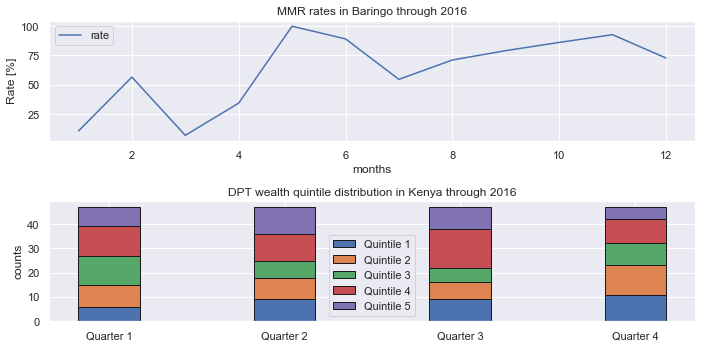

In [86]:
# Plot the simple time series 
my_ts = plt.figure()
my_ts.set_size_inches(10,5)         # Specify the output size
ax1 = my_ts.add_subplot(211)        # Add an axis frame object to the plot (i.e. a pannel)
ax2 = my_ts.add_subplot(212) 


categories = ['Quintile 1','Quintile 2','Quintile 3','Quintile 4','Quintile 5']
locations = ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']    # the x locations for the groups

width = 0.35       # the width of the bars

for i in range(len(values)):
    if i == 0:
        ax2.bar(locations, values[i], width, label=categories[i], edgecolor ='k')
        past_values = np.array(values[i])
    else:
        ax2.bar(locations, values[i], width, bottom=past_values, label=categories[i], edgecolor ='k')
        past_values = np.array(values[i]) + past_values

ax2.set_title('DPT wealth quintile distribution in Kenya'+' through '+str(year))
ax2.set_ylabel('counts')
ax2.legend()

ax1.plot(mmr['month'], mmr['rate'])
ax1.set_title('MMR rates in '+ province+' through '+str(year))
ax1.set_xlabel('months')
ax1.set_ylabel('Rate [%]')
ax1.legend()

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
my_ts.savefig('DPY_MMR.png',dpi=300)

If we want to compare the vaccination rates of two vaccines that have different temporal resolutions, we have to resampled the data to the coarser resolution. In this particular case we resample the MMR monthly data by taking the mean of each quarter. In addition we can also resample quarterly data to yearly for both vaccines.

In [87]:
mmr = data_1[data_1['vaccine_type'] == 'MMR'].copy()

months = np.arange(12)+1
quarters = np.repeat(np.arange(4)+1, 3)
dic = dict(zip(months, quarters))

mmr['quarter'] = mmr['month'].apply(lambda x: dic[x])
mmr['quarter_rate'] = mmr.groupby(['quarter', 'year'])['rate'].transform(np.mean)
mmr['quarter_rate_error'] = mmr.groupby(['quarter', 'year'])['rate'].transform(np.std)

mmr['year_rate'] = mmr.groupby(['year'])['rate'].transform(np.mean)
mmr['year_rate_error'] = mmr.groupby(['year'])['rate'].transform(np.std)

mmr.iloc[:12]

,geometry,iso_1,province,vaccine_type,rate,wealth_quintile,month,quarter,year,quarter_rate,quarter_rate_error,year_rate,year_rate_error
0,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,90.79,NaN,1,1,2000,47.869574,28.734877,49.577766,28.450278
1,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,40.46,NaN,2,1,2000,47.869574,28.734877,49.577766,28.450278
2,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,74.28,NaN,3,1,2000,47.869574,28.734877,49.577766,28.450278
3,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,46.00,NaN,4,2,2000,51.312482,28.847141,49.577766,28.450278
4,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,94.16,NaN,5,2,2000,51.312482,28.847141,49.577766,28.450278
5,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,21.06,NaN,6,2,2000,51.312482,28.847141,49.577766,28.450278
6,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,68.67,NaN,7,3,2000,50.419220,27.117703,49.577766,28.450278
7,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,61.48,NaN,8,3,2000,50.419220,27.117703,49.577766,28.450278
8,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,22.30,NaN,9,3,2000,50.419220,27.117703,49.577766,28.450278
9,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,MMR,80.90,NaN,10,4,2000,48.709787,29.229370,49.577766,28.450278


In column `quarter_rate` we are now showing the vaccination rates of each quarter. In addition, we have also compute the standard deviation in column `quarter_rate_error` to have an estimation of the error.

In [35]:
dpt = data_1[data_1['vaccine_type'] == 'DPT'].copy()

dpt['year_rate'] = dpt.groupby(['year'])['rate'].transform(np.mean)
dpt['year_rate_error'] = dpt.groupby(['year'])['rate'].transform(np.std)

dpt.iloc[:4]

,geometry,iso_1,province,vaccine_type,rate,wealth_quintile,month,quarter,year,year_rate,year_rate_error
0,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,71.46,4,NaN,1,2000,52.317713,28.277193
1,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,97.12,5,NaN,2,2000,52.317713,28.277193
2,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,20.61,2,NaN,3,2000,52.317713,28.277193
3,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",KEN.1_1,Baringo,DPT,70.40,4,NaN,4,2000,52.317713,28.277193


Now we are ready to compare the vaccination rates. As an example we can compare the vaccination rates of a given province in Kenya in a time span of three years.

In [36]:
dpt_compare = dpt[(dpt['province'] == 'Nairobi') & (dpt['year'] > 2015)].copy()
mmr_compare = mmr[(mmr['province'] == 'Nairobi') & (mmr['year'] > 2015)].copy()
mmr_compare = mmr_compare.groupby(['quarter', 'year'], as_index=False).first().sort_values('year')

Filterd DPT data.
- Quarterly:

In [37]:
dpt_compare['error'] = np.nan
dpt_result = dpt_compare[['province', 'vaccine_type', 'rate', 'error', 'quarter', 'year']].copy()
dpt_result

,province,vaccine_type,rate,error,quarter,year
64,Nairobi,DPT,37.91,NaN,1,2016
65,Nairobi,DPT,65.55,NaN,2,2016
66,Nairobi,DPT,86.17,NaN,3,2016
67,Nairobi,DPT,11.93,NaN,4,2016
68,Nairobi,DPT,42.82,NaN,1,2017
69,Nairobi,DPT,83.44,NaN,2,2017
70,Nairobi,DPT,12.09,NaN,3,2017
71,Nairobi,DPT,22.97,NaN,4,2017
72,Nairobi,DPT,40.10,NaN,1,2018
73,Nairobi,DPT,62.99,NaN,2,2018


- Yearly:

In [38]:
dpt_yearly = dpt_compare.groupby(['year'], as_index=False).first()
dpt_yearly[['province', 'vaccine_type', 'year_rate', 'year_rate_error', 'year']].rename(columns={'year_rate': 'rate', 'year_rate_error': 'error'})

,province,vaccine_type,rate,error,year
0,Nairobi,DPT,47.312766,28.995723,2016
1,Nairobi,DPT,53.393670,28.194705,2017
2,Nairobi,DPT,52.247287,28.206893,2018


Filterd MMR data.
- Quarterly:

In [39]:
mmr_result = mmr_compare[['province', 'vaccine_type', 'quarter_rate', 'quarter_rate_error', 'quarter', 'year']].rename(columns={'quarter_rate': 'rate', 'quarter_rate_error': 'error'})
mmr_result

,province,vaccine_type,rate,error,quarter,year
0,Nairobi,MMR,51.944397,29.380209,1,2016
3,Nairobi,MMR,51.804894,30.998980,2,2016
6,Nairobi,MMR,45.641915,27.169922,3,2016
9,Nairobi,MMR,51.937447,27.630637,4,2016
1,Nairobi,MMR,46.359291,27.713814,1,2017
4,Nairobi,MMR,51.886028,28.683627,2,2017
7,Nairobi,MMR,51.236028,29.734762,3,2017
10,Nairobi,MMR,49.150142,28.757322,4,2017
2,Nairobi,MMR,49.075603,26.505656,1,2018
5,Nairobi,MMR,50.704255,27.727140,2,2018


- Yearly:

In [40]:
mmr_yearly = mmr_compare.groupby(['year'], as_index=False).first()
mmr_yearly[['province', 'vaccine_type', 'year_rate', 'year_rate_error', 'year']].rename(columns={'year_rate': 'rate', 'year_rate_error': 'error'})

,province,vaccine_type,rate,error,year
0,Nairobi,MMR,50.332163,28.885395,2016
1,Nairobi,MMR,49.657872,28.735768,2017
2,Nairobi,MMR,49.588138,27.654486,2018


We have visualized these data as a line chart bounded by shaded bands: 

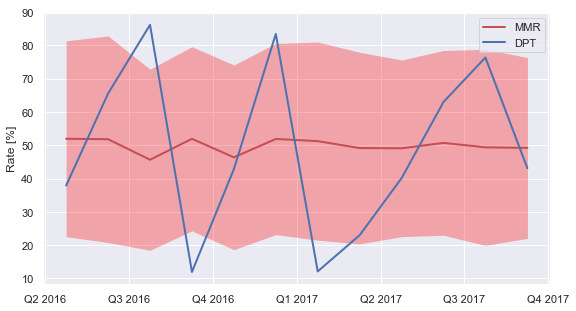

In [88]:
lthick=2.0

xlabs = []
for n, year in enumerate(mmr_result.year.unique()):
    for i in range(4):
        xlabs.append(f"Q{i+1} {year}")
        
fig2 = plt.figure()
fig2.set_size_inches(20, 5)
ax1 = fig2.add_subplot(121) 
ax1.plot(mmr_result.year+(mmr_result.quarter*3-1.5)/12, mmr_result.rate, 'r-', lw=lthick, label='MMR')
ax1.fill_between(mmr_result.year+(mmr_result.quarter*3-1.5)/12, mmr_result.rate-mmr_result.error, mmr_result.rate+mmr_result.error,
                    color='red', linewidth=0.1, alpha=0.3)

ax1.plot(dpt_result.year+(dpt_result.quarter*3-1.5)/12, dpt_result.rate, 'b-', lw=lthick, label='DPT')

ax1.set_ylabel('Rate [%]')
ax1.legend()
ax1.set_xticklabels(xlabs)

fig2.savefig('compare.png',dpi=300, bbox_inches='tight')

***2. Consider a case in which you have a dataset with a mix of dimensions and attributes, i.e. the dimensions are the axes of the hypercube that identify the observation values, while the attributes represent additional useful metadata about the values (singly or as     an aggregate set). Using an imaginary dataset based on measures of stunting and wasting of children by age group, sex, country, and year, describe with text and visual examples how you would organize the dimensions, attributes and observation values both in tabular and chart formats.***

#### **Imaginary dataset**

We have created an imaginary dataset that fulfill the above-mentioned requirements.

In [15]:
data = gpd.read_file('./gadm36_KEN_shp/gadm36_KEN_1.shp')
data.columns = map(str.lower, data.columns)
data = data[['gid_1', 'name_1']]
data.rename(columns={'gid_1': 'iso_1', 'name_1': 'province'}, inplace= True)

data = pd.concat([data,pd.DataFrame(columns=['indicator_type', 'value', 'age_group', 'sex', 'year', 'attribute_singly'])], sort=True)

indicators = ['stunting', 'wasting']

data_2 = pd.DataFrame(columns=list(data.columns))

years = np.arange(2000, 2019, 1)
sex = ['male', 'female']
age_group = ['0 – 4 years old', '5 – 9 years old', '10 – 14 years old', '15 – 18 years old']

for indicator in indicators:
    data_indicator = pd.DataFrame(columns=list(data.columns))
    for n, iso in enumerate(data['iso_1'].unique()):
        data_iso = data.iloc[n:n+1]
        
        nrows = len(years)*len(sex)*len(age_group)-1
    
        data_iso = data_iso.append([data_iso]*nrows,ignore_index=True, sort=True)

        data_iso['sex'] = np.tile(np.concatenate([np.repeat('male', len(age_group)), np.repeat('female', len(age_group))]), len(years))
        data_iso['age_group'] = np.tile(age_group, len(years)*len(sex))
        data_iso['year'] = np.repeat(years, len(sex)*len(age_group))
    
        data_indicator = pd.concat([data_indicator, data_iso])
    
    value = np.random.uniform(low=0.0, high=100, size=(len(data_indicator),)).round(2)
    
    data_indicator['value'] = value

    #data_indicator['sex'] = np.random.choice(sex, len(data_indicator))

    data_indicator['indicator_type'] = indicator

    data_2 = pd.concat([data_2, data_indicator])
    
data_2['attribute_singly'] = np.core.defchararray.add(np.repeat('metadata ', len(data_2)), np.arange(len(data_2)).astype('str'))
    
data_2 = data_2[['iso_1', 'province', 'indicator_type', 'value', 'age_group', 'sex', 'year', 'attribute_singly']]

#### **Data arrangement**

In [16]:
data_2.head(8)

,iso_1,province,indicator_type,value,age_group,sex,year,attribute_singly
0,KEN.1_1,Baringo,stunting,1.86,0 – 4 years old,male,2000,metadata 0
1,KEN.1_1,Baringo,stunting,2.31,5 – 9 years old,male,2000,metadata 1
2,KEN.1_1,Baringo,stunting,47.60,10 – 14 years old,male,2000,metadata 2
3,KEN.1_1,Baringo,stunting,8.40,15 – 18 years old,male,2000,metadata 3
4,KEN.1_1,Baringo,stunting,44.12,0 – 4 years old,female,2000,metadata 4
5,KEN.1_1,Baringo,stunting,95.95,5 – 9 years old,female,2000,metadata 5
6,KEN.1_1,Baringo,stunting,83.63,10 – 14 years old,female,2000,metadata 6
7,KEN.1_1,Baringo,stunting,2.07,15 – 18 years old,female,2000,metadata 7


In column `attribute_singly` we could include any kind of attribute per value. In order to have additional useful metadata aggregated by a set of values we can create another table. As an example we could have various attributes related to each provice.  

Dataset with aggregated attribute per province:

In [17]:
data_3 = gpd.read_file('./gadm36_KEN_shp/gadm36_KEN_1.shp')
data_3.columns = map(str.lower, data_3.columns)
data_3 = data_3[['gid_1', 'geometry']]
data_3.rename(columns={'gid_1': 'iso_1'}, inplace= True)

data_3['attribute_aggregate'] = np.core.defchararray.add(np.repeat('metadata ', len(data_3)), data_3['iso_1'].unique())

data_3.head()

,iso_1,geometry,attribute_aggregate
0,KEN.1_1,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",metadata KEN.1_1
1,KEN.2_1,"POLYGON ((35.26192856 -1.01562488, 35.26177216...",metadata KEN.2_1
2,KEN.3_1,"POLYGON ((34.45475769 0.47292694, 34.45463181 ...",metadata KEN.3_1
3,KEN.4_1,"POLYGON ((34.24632263 0.31445998, 34.24585724 ...",metadata KEN.4_1
4,KEN.5_1,"(POLYGON ((35.58806229 0.1745251, 35.58784485 ...",metadata KEN.5_1


We can also add data from multiple sources into a single table by merging them together using a common column. In this particular case we can merge them by using the `iso_1` column.

In [18]:
pd.merge(data_2, data_3, how='left', on='iso_1').head(4)

,iso_1,province,indicator_type,value,age_group,sex,year,attribute_singly,geometry,attribute_aggregate
0,KEN.1_1,Baringo,stunting,1.86,0 – 4 years old,male,2000,metadata 0,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",metadata KEN.1_1
1,KEN.1_1,Baringo,stunting,2.31,5 – 9 years old,male,2000,metadata 1,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",metadata KEN.1_1
2,KEN.1_1,Baringo,stunting,47.60,10 – 14 years old,male,2000,metadata 2,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",metadata KEN.1_1
3,KEN.1_1,Baringo,stunting,8.40,15 – 18 years old,male,2000,metadata 3,"(POLYGON ((35.67241287 1.07305849, 35.67227554...",metadata KEN.1_1


***3. Common query operations over multi-dimensional data sets include slicing, dicing, drilling-down, and rolling up. Please describe with text and visual examples how you would design a data dashboard capable of handling all such operations over a dataset consisting of educational enrollment, attainment, and dropout rates, by sex, grade level, country, and year.***

In [19]:
data = gpd.read_file('./gadm36_KEN_shp/gadm36_KEN_1.shp')
data.columns = map(str.lower, data.columns)
data = data[['gid_1', 'name_1']]
data.rename(columns={'gid_1': 'iso_1', 'name_1': 'province'}, inplace= True)

data = pd.concat([data,pd.DataFrame(columns=['indicator', 'rate', 'grade_level', 'sex', 'year'])], sort=True)

indicators = ['enrollment', 'attainment', 'dropout']

data_4 = pd.DataFrame(columns=list(data.columns))

years = np.arange(2000, 2019, 1)
sex = ['male', 'female']
grade_level = ['Early childhood education', 'Primary education', 'Secondary education']

for indicator in indicators:
    data_indicator = pd.DataFrame(columns=list(data.columns))
    for n, iso in enumerate(data['iso_1'].unique()):
        data_iso = data.iloc[n:n+1]
        
        nrows = len(years)*len(sex)*len(grade_level)-1
    
        data_iso = data_iso.append([data_iso]*nrows,ignore_index=True, sort=True)

        data_iso['sex'] = np.tile(np.concatenate([np.repeat('male', len(grade_level)), np.repeat('female', len(grade_level))]), len(years))
        data_iso['grade_level'] = np.tile(grade_level, len(years)*len(sex))
        data_iso['year'] = np.repeat(years, len(sex)*len(grade_level))
    
        data_indicator = pd.concat([data_indicator, data_iso])
    
    value = np.random.uniform(low=0.0, high=100, size=(len(data_indicator),)).round(2)
    
    data_indicator['rate'] = value

    #data_indicator['sex'] = np.random.choice(sex, len(data_indicator))

    data_indicator['indicator'] = indicator

    data_4 = pd.concat([data_4, data_indicator])
    
    
data_4 = data_4[['iso_1', 'province', 'indicator', 'rate', 'grade_level', 'sex', 'year']]

In [20]:
data_4.head(6)

,iso_1,province,indicator,rate,grade_level,sex,year
0,KEN.1_1,Baringo,enrollment,14.78,Early childhood education,male,2000
1,KEN.1_1,Baringo,enrollment,53.04,Primary education,male,2000
2,KEN.1_1,Baringo,enrollment,56.65,Secondary education,male,2000
3,KEN.1_1,Baringo,enrollment,3.99,Early childhood education,female,2000
4,KEN.1_1,Baringo,enrollment,71.35,Primary education,female,2000
5,KEN.1_1,Baringo,enrollment,13.76,Secondary education,female,2000
